In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/RE_MACHINE_LEARNING_22/train_0.csv")
test = pd.read_csv("/content/drive/MyDrive/RE_MACHINE_LEARNING_22/test.csv")
train

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1,1002,-33.313030,-0.0000,0.000000,1.854800,-0.0000,0.000000,0.0000,41.8048,...,0.0,0.000,0.000,0.000,0.00,0.000,3,B,0,0
1,1,1002,-33.206146,-0.0000,0.000000,1.854800,-0.0000,0.000000,0.0000,42.2616,...,0.0,0.000,0.000,0.000,0.00,0.000,3,B,0,0
2,1,1002,-33.098114,-0.0000,0.000000,1.854800,-0.0000,0.000000,0.0000,43.2270,...,0.0,0.000,0.000,0.000,0.00,0.000,3,B,0,0
3,1,1002,-32.993190,-0.0000,0.000000,1.854800,-0.0000,0.000000,0.0000,43.8984,...,0.0,0.000,0.000,0.000,0.00,0.000,3,B,0,0
4,1,1002,-32.887756,-0.0000,0.000000,1.854800,-0.0000,0.000000,0.0000,44.9606,...,0.0,0.000,0.000,0.000,0.00,0.000,3,B,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149376,737,737005,-0.473386,11.6650,25.500801,15.000999,-11.0376,48.485400,30.1854,36.1764,...,0.0,-6.918,-2.748,-2.418,-9.05,-4.574,-1,NaN,0,0
2149377,737,737005,-0.363688,10.3796,31.147000,18.421200,-10.9984,48.311802,28.5632,36.6466,...,0.0,-6.810,-2.639,-2.310,-8.94,-4.465,-1,NaN,0,0
2149378,737,737005,-0.254574,9.1902,36.371002,21.428001,-10.9620,48.150600,27.0618,37.1824,...,0.0,-6.700,-2.531,-2.201,-8.83,-4.360,-1,NaN,0,0
2149379,737,737005,-0.145479,8.1868,40.778202,23.845400,-10.9312,48.016200,25.7954,37.6878,...,0.0,-6.590,-2.422,-2.092,-8.72,-4.250,-1,NaN,0,0


# **EDA**

In [ ]:
train.describe()

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
count,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.130390e+06,...,2.130318e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06
mean,3.678573e+02,3.678601e+05,-6.615076e+01,-1.711843e-01,-8.701548e-03,1.566230e+01,-3.763223e-03,2.237860e-02,1.148253e-01,-8.151923e-02,...,4.577625e+01,-2.727069e+00,-2.754303e+00,-3.226214e+00,-3.220364e+00,-2.751841e+00,-2.718325e+00,1.604489e+00,5.831074e-02,5.575280e-02
std,2.125500e+02,2.125501e+05,6.682579e+01,4.909460e+01,6.008009e+01,1.044591e+01,2.316391e+01,2.806578e+01,1.228911e+01,4.550489e+01,...,3.410338e+01,3.301398e+00,3.306345e+00,3.364020e+00,3.363124e+00,3.306341e+00,3.300695e+00,2.080762e+00,2.343302e-01,2.294438e-01
min,1.000000e+00,1.002000e+03,-7.205285e+02,-8.079200e+01,-1.043092e+02,1.296000e+00,-9.920059e+01,-8.797200e+01,-6.299300e+01,-8.189000e+01,...,0.000000e+00,-9.984000e+00,-9.984000e+00,-9.970000e+00,-9.984000e+00,-9.970000e+00,-9.970000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,1.830000e+02,1.830040e+05,-9.148513e+01,-4.498640e+01,-5.354000e+01,6.395000e+00,-1.558660e+01,-2.184260e+01,-7.648400e+00,-3.730970e+01,...,1.294000e+01,-5.477000e+00,-5.527000e+00,-6.200000e+00,-6.195000e+00,-5.523000e+00,-5.465000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.650000e+02,3.650040e+05,-4.588233e+01,0.000000e+00,0.000000e+00,1.412580e+01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,...,4.275000e+01,-6.904000e-01,-7.900000e-01,-2.193000e+00,-2.186000e+00,-7.803000e-01,-6.540000e-01,1.000000e+00,0.000000e+00,0.000000e+00
75%,5.530000e+02,5.530020e+05,-1.925391e+01,4.450460e+01,5.377380e+01,2.366960e+01,1.563160e+01,2.181040e+01,7.640200e+00,3.711940e+01,...,7.694000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
max,7.370000e+02,7.370050e+05,-1.714620e-02,8.069160e+01,1.043092e+02,3.943720e+01,9.838720e+01,1.011442e+02,6.794280e+01,8.190180e+01,...,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
train.columns

Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec'],
      dtype='object')

In [ ]:
train.isna().sum()

game_num                            0
event_id                            0
event_time                          0
ball_pos_x                          0
ball_pos_y                          0
                                ...  
boost5_timer                        0
player_scoring_next                 0
team_scoring_next              506604
team_A_scoring_within_10sec         0
team_B_scoring_within_10sec         0
Length: 61, dtype: int64

X is width, Y is length, and Z is height

In [ ]:
train.groupby('event_id')['ball_pos_x'].agg(['max', 'mean', 'min'])['max'].max()

80.691605

In [ ]:
train[~train['team_scoring_next'].isna()]['ball_pos_x'].mean()

-0.3322500116605351

In [ ]:
train[~train['team_scoring_next'].isna()]['ball_pos_y'].mean()

-0.21917737586348351

In [ ]:
train[~train['team_scoring_next'].isna()]['ball_pos_z'].mean()

15.61964383434605

Using event time to determine field and goal dimensions

In [ ]:
train[(train['team_scoring_next']=='B')&(train['event_time']>-.1)]['ball_pos_x'].min()

-16.211601

In [ ]:
train[(train['team_scoring_next']=='A')&(train['event_time']>-.2)]['ball_pos_y'].mean()

101.39534039461884

In [ ]:
train[(train['team_scoring_next']=='A')&(train['event_time']>-.1)]['ball_pos_z'].max()

11.007199

Dimensions of Field = 160X200X40, Dimensions of Goal = 32X11

Radius of the ball = around 1.3

In [ ]:
train.groupby('event_id')['ball_pos_z'].agg(['max', 'mean', 'min'])['min'].min()

1.296

**Feature Engineering**: Code for distance of each player to respecive center of the goal, and ball to the center of each goal

In [ ]:
for player in range(0,3):
  train['d'+str(player)+'goal'] = ((0 - train['p'+str(player)+'_pos_x'])**2+(100-train['p'+str(player)+'_pos_y'])**2+(5.5-train['p'+str(player)+'_pos_z'])**2)**(1/2)
  test['d'+str(player)+'goal'] = ((0 - test['p'+str(player)+'_pos_x'])**2+(100-test['p'+str(player)+'_pos_y'])**2+(5.5-test['p'+str(player)+'_pos_z'])**2)**(1/2)
for player in range(3,6):
  train['d'+str(player)+'goal'] = ((0 - train['p'+str(player)+'_pos_x'])**2+(-100-train['p'+str(player)+'_pos_y'])**2+(5.5-train['p'+str(player)+'_pos_z'])**2)**(1/2)
  test['d'+str(player)+'goal'] = ((0 - test['p'+str(player)+'_pos_x'])**2+(-100-test['p'+str(player)+'_pos_y'])**2+(5.5-test['p'+str(player)+'_pos_z'])**2)**(1/2)

train['dballAgoal'] = ((0 - train['ball_pos_x'])**2+(100-train['ball_pos_y'])**2+(5.5-train['ball_pos_z'])**2)**(1/2)
test['dballAgoal'] = ((0 - test['ball_pos_x'])**2+(100-test['ball_pos_y'])**2+(5.5-test['ball_pos_z'])**2)**(1/2)

train['dballBgoal'] = ((0 - train['ball_pos_x'])**2+(-100-train['ball_pos_y'])**2+(5.5-train['ball_pos_z'])**2)**(1/2)
test['dballBgoal'] = ((0 - test['ball_pos_x'])**2+(-100-test['ball_pos_y'])**2+(5.5-test['ball_pos_z'])**2)**(1/2)

Interactive Visual Correlation

In [ ]:
cols2 = ['dballAgoal', 'dballBgoal', 'ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'team_A_scoring_within_10sec', 'team_B_scoring_within_10sec', 'd0goal', 'd1goal', 'd2goal', 'd3goal','d4goal', 'd5goal']
t = train[cols2]
fig = px.imshow(t.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

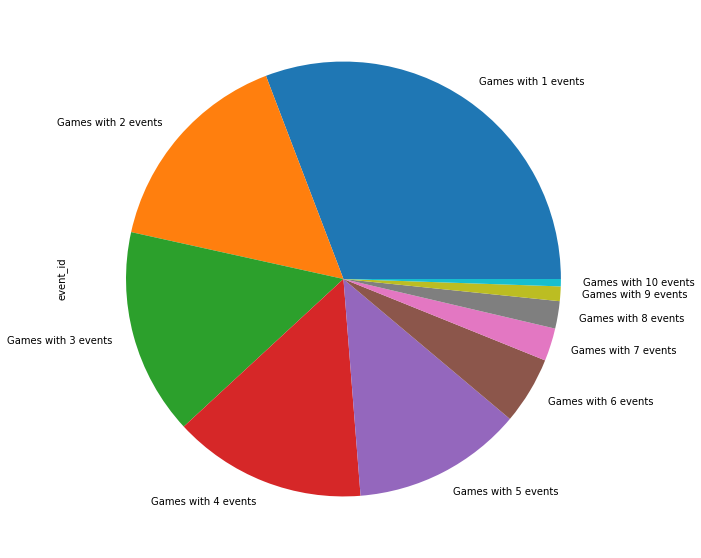

In [ ]:
labels = [f"Games with {i+1} events" for i in range(10)]
train.groupby(['game_num'])['event_id'].nunique().value_counts().plot(kind="pie", labels=labels,figsize = (25, 10))

Notice how ball congregates around Goal A for the Team A Field, while the ball congregates around Goal B for the Team B field. There is also a strong correlation at the center of the field because the ball resets to the center after an event begins and many teams score in this scenario

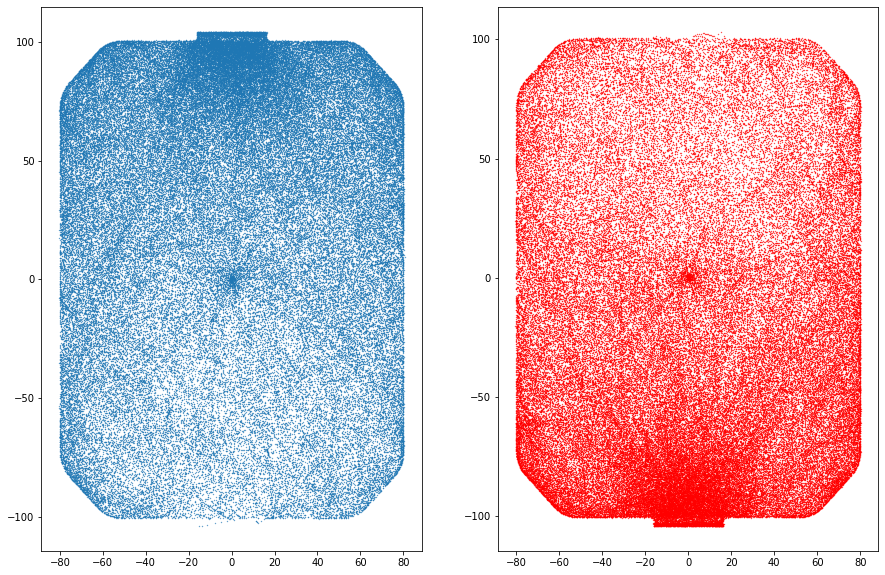

In [ ]:
# Team A field vs Team B Field
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))
axes[0].scatter(train[train['team_A_scoring_within_10sec']==1]['ball_pos_x'], train[train['team_A_scoring_within_10sec']==1]['ball_pos_y'], s=0.1)
axes[1].scatter(train[train['team_B_scoring_within_10sec']==1]['ball_pos_x'], train[train['team_B_scoring_within_10sec']==1]['ball_pos_y'], s=0.1, c="red")
#A is BLUE, B IS RED

# **Modeling**

Method to evaluate model

In [ ]:
def evaluateModel(Xtrain, Ytrain, Xtest, Ytest, model):
  model.fit(Xtrain, Ytrain)
  score = model.score(Xtrain, Ytrain) 
  print("Model Training score: %.2f" %score)
  #kfold = KFold(n_splits=10, shuffle=True)
  #kf_cv_scores = cross_val_score(model, Xtrain, Ytrain, cv=kfold )
  #print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
  ypred = model.predict(Xtest)
  mse = mean_squared_error(Ytest, ypred)
  print("MSE: %.2f" % mse)
  score = log_loss(Ytest, ypred)
  print("Log_Loss: %.2f" % score)
  #Kaggle

In [ ]:
#At first, we omitted the distance of each player to their respective goals (columns in colsImp). However, we decided to include the columns but the log loss was around the same. 
cols = ['dballAgoal', 'dballBgoal', 'ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'd0goal', 'd1goal', 'd2goal', 'd3goal','d4goal', 'd5goal']
colsImp = ['d0goal', 'd1goal', 'd2goal', 'd3goal','d4goal', 'd5goal']
X = train[cols]
x_test = test[cols]
X.isna().sum()
#Because we have NaN values, we have to impute

dballAgoal        0
dballBgoal        0
ball_pos_x        0
ball_pos_y        0
ball_pos_z        0
ball_vel_x        0
ball_vel_y        0
ball_vel_z        0
d0goal        18991
d1goal        18620
d2goal        19517
d3goal        19830
d4goal        18531
d5goal        19063
dtype: int64

In [ ]:
y = train['team_A_scoring_within_10sec']
y.isna().sum()

0

Imputing NaN Values

In [ ]:
imp = SimpleImputer()
imp_constant = SimpleImputer(strategy = 'mean', fill_value = 'missing')
ct = make_column_transformer((imp_constant, colsImp), remainder='passthrough')
X = ct.fit_transform(X)
x_test = ct.fit_transform(x_test)

Testing Logistic Regression, XGBClassifier, Random Forest Classifier

In [ ]:
logreg = LogisticRegression(solver = 'liblinear', random_state=1)
xgbr = xgb.XGBClassifier(verbosity=0, n_estimators = 20) 
clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.15)
evaluateModel(X_train, Y_train, X_test, Y_test, clf)

# **XGBoost**

Training Model for Scoring in Goal A

In [ ]:
x = X.copy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=67)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state=123)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label = y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_params={"learning_rate": 0.1, 'lambda':0.1}
xmodel = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds = 1)
y_pred = xmodel.predict(dtest)

#score = log_loss(y_test, y_pred)
#print("Log_Loss: %.2f" % score)

[0]	eval-rmse:0.460818
Will train until eval-rmse hasn't improved in 1 rounds.
[1]	eval-rmse:0.426386
[2]	eval-rmse:0.396184
[3]	eval-rmse:0.370108
[4]	eval-rmse:0.347433
[5]	eval-rmse:0.327941
[6]	eval-rmse:0.311255
[7]	eval-rmse:0.29701
[8]	eval-rmse:0.284964
[9]	eval-rmse:0.274774
[10]	eval-rmse:0.266236
[11]	eval-rmse:0.259086
[12]	eval-rmse:0.25312
[13]	eval-rmse:0.248189
[14]	eval-rmse:0.244096
[15]	eval-rmse:0.24072
[16]	eval-rmse:0.237929
[17]	eval-rmse:0.235658


Training Model for Scoring in Goal B

In [ ]:
yB = train['team_B_scoring_within_10sec']

X_train, X_test, y_train, y_test = train_test_split(x, yB, test_size = .3, random_state=67)
X_train, X_val, y_train, y_val = train_test_split(x, yB, test_size = .2, random_state=123)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label = y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_params={"learning_rate": 0.1, 'lambda':0.1}
xmodelB = xgb.train(xgb_params, dtrain, num_boost_round=50, evals=[(dval, 'eval')], early_stopping_rounds = 1)
y_predB = xmodel.predict(dtest)

#score = log_loss(y_test, y_predB)
#print("Log_Loss: %.2f" % score)


[0]	eval-rmse:0.460338
Will train until eval-rmse hasn't improved in 1 rounds.
[1]	eval-rmse:0.425477
[2]	eval-rmse:0.395027
[3]	eval-rmse:0.368375
[4]	eval-rmse:0.345417
[5]	eval-rmse:0.325572
[6]	eval-rmse:0.308532
[7]	eval-rmse:0.294
[8]	eval-rmse:0.281638
[9]	eval-rmse:0.271216
[10]	eval-rmse:0.262464
[11]	eval-rmse:0.255123
[12]	eval-rmse:0.249016
[13]	eval-rmse:0.243924
[14]	eval-rmse:0.239716
[15]	eval-rmse:0.236234
[16]	eval-rmse:0.233373
[17]	eval-rmse:0.230999
[18]	eval-rmse:0.229054
[19]	eval-rmse:0.22745
[20]	eval-rmse:0.226131
[21]	eval-rmse:0.225024
[22]	eval-rmse:0.224125
[23]	eval-rmse:0.223381
[24]	eval-rmse:0.222768
[25]	eval-rmse:0.222256
[26]	eval-rmse:0.221827
[27]	eval-rmse:0.221481
[28]	eval-rmse:0.221187
[29]	eval-rmse:0.220929
[30]	eval-rmse:0.220706
[31]	eval-rmse:0.220529
[32]	eval-rmse:0.220365
[33]	eval-rmse:0.220221
[34]	eval-rmse:0.22008
[35]	eval-rmse:0.21997
[36]	eval-rmse:0.219876
[37]	eval-rmse:0.21981
[38]	eval-rmse:0.219742
[39]	eval-rmse:0.219669
[

# **Predictions and Submissions**

In [ ]:
dtest = xgb.DMatrix(x_test, label = y)
answers = xmodel.predict(dtest)#.round(0).astype(int)
dtest = xgb.DMatrix(x_test, label = yB)
answersB = xmodelB.predict(dtest)

In [ ]:
submissionFile = pd.DataFrame({'id': test.id,  'team_A_scoring_within_10sec': answers, 'team_B_scoring_within_10sec': answersB}).to_csv('TabularPlaygroundSubmission.csv', index=False)
submissionFile